# Example: Modelling a gas

Suppose that I want to simulate a gas, i.e. a collection of particles in a two-dimensional box that move around.
A particle has a position, which is a 2D vector, a velocity, which is another 2D vector, and a mass, that is a real number. How can I represent this in Julia?

# User-defined types 

As we have started to see, the basic types in Julia, such as `Complex`, are defined in Julia code.
They are treated on the same footing as types defined by the user.

Composite types in Julia are just boxes that hold data and provide constructor functions for making new objects of that type. They *do not contain methods (functions)* (as would be the case in many other object-oriented languages); rather, the methods are defined using multiple dispatch.

## Example: Fixed-size vectors 

Currently, there are no fixed-size vectors in base Julia (although these are available, for example, in the `ImmutableArrays` and `FixedSizeVectors` packages). For many applications, fixed-size vectors are useful, for example for representing positions of particles moving in 2D or 3D space. We can define our own type that may prove to be more efficient than Julia's `Array` type.

The basic syntax for defining a composite type is

In [1]:
type Vector2D
    x::Float64
    y::Float64
end

In [2]:
Vector2D

Vector2D (constructor with 2 methods)

In [3]:
methods(Vector2D)

# 2 methods for generic function "Vector2D":
Vector2D(x::Float64,y::Float64)
Vector2D(x,y)

The double colon (`::`) is a **type annotation** that specifies the type of `x` and `y`.

Let's  check which methods have been defined:

In [ ]:
methods(Vector2D)

In [4]:
v = Vector2D(3.5, 4.5)

Vector2D(3.5,4.5)

In [5]:
v

Vector2D(3.5,4.5)

In [6]:
typeof(v)

Vector2D (constructor with 2 methods)

In [7]:
Vector2D(3, 4)

Vector2D(3.0,4.0)

In [9]:
Vector2D('α', 'd')

Vector2D(945.0,100.0)

In [10]:
v = 3

3

In [11]:
typeof(v)

Int64

In [12]:
v

3

In [13]:
Base.show(io::IO, x::Int) = print(io, "HELLO($x)")

show (generic function with 92 methods)

In [14]:
3

HELLO(3)

In [15]:
using SymPy

In [16]:
x = symbols("x")

x

In [17]:
v = Vector2D("a", "b")

LoadError: `convert` has no method matching convert(::Type{Float64}, ::ASCIIString)
while loading In[17], in expression starting on line 1

In [18]:
v = Vector2D(3, 4)
w = Vector2D(5, 6)

Vector2D(5.0,6.0)

What happens if we try to add two `Vector2D`s?

In [19]:
v + w

LoadError: `+` has no method matching +(::Vector2D, ::Vector2D)
while loading In[19], in expression starting on line 1

Julia confirms that it has no idea how to do so. So let's just try defining it:

In [20]:
+(a::Vector2D, b::Vector2D) = Vector2D(a.x+b.x, a.y+b.y)

+ (generic function with 140 methods)

In [27]:
workspace()  # clear the workspace

In [26]:
Vector2D

LoadError: Vector2D not defined
while loading In[26], in expression starting on line 1

In [30]:
;ls

0. Invitation to Julia.ipynb
1. Starting out.ipynb
2. Making new types.ipynb
3. Metaprogramming.ipynb
4. In search of performance.ipynb
5. Developing a package.ipynb
Installation.ipynb
LICENSE.md
README.md
Vector2D.jl
unam_photos.jpg


In [33]:
Vector{Float64}

Array{Float64,HELLO(1)}

In [31]:
include("Vector2D.jl")

+ (generic function with 141 methods)

In [32]:
Vector2D

Vector2D (constructor with 2 methods)

In [21]:
v + w

Vector2D(8.0,10.0)

In [22]:
const aaa = 17

HELLO(17)

In [23]:
aaa = 13.5

LoadError: invalid redefinition of constant aaa
while loading In[23], in expression starting on line 1

In [24]:
aaa = 117

HELLO(117)

In [34]:
using PyPlot

INFO: Loading help data...


In [36]:

plt.use("ggplot")

LoadError: use not defined
while loading In[36], in expression starting on line 1

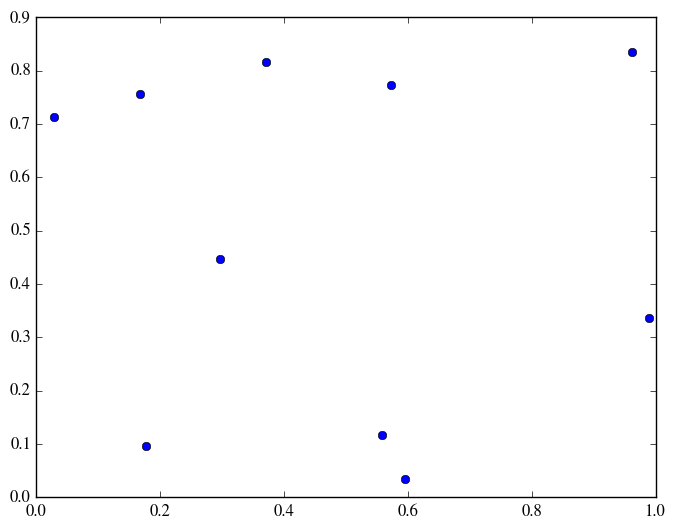

1-element Array{Any,HELLO(1)}:
 PyObject <matplotlib.lines.Line2D object at 0x115b18b10>

In [35]:
plot(rand(10), rand(10), "o")

Suddenly, it works! This is Julia's version of operator overloading -- just add a new method to the relevant operator that acts on objects of your new type.

In [37]:
dot(a::Vector2D, b::Vector2D) = a.x*b.x + a.y+b.y

dot (generic function with 1 method)

Julia has certain Unicode operators defined, for example `\cdot<TAB>`:

In [38]:
⋅

dot (generic function with 7 methods)

In [43]:
Base.dot

dot (generic function with 7 methods)

We see that this operator is just an alias for the `dot` function, but that is parsed as in infix operator. So we can now write

In [46]:
v = Vector2D(3, 4)
w = Vector2D(5, 6)

Vector2D(5.0,6.0)

In [42]:
v ⋅ w

LoadError: `dot` has no method matching dot(::Vector2D, ::Vector2D)
while loading In[42], in expression starting on line 1

It doesn't work. What's the matter? The signal was given by Julia when we defined `dot`: it said there was only 1 method. But `\cdot<TAB>` has 7 methods. So they are different functions. The solution is that the name `dot` refers to Julia's built-in `dot` function, which is defined in Julia's standard library, called `Base`. So the true name of the function is `Base.dot`:

In [ ]:
Base.dot

We thus need to *extend* this function instead:

In [47]:
Base.dot(a::Vector2D, b::Vector2D) = a.x*b.x + a.y*b.y

dot (generic function with 8 methods)

In [48]:
v ⋅ w

39.0

Julia provides an `import` keyword to make this simpler when we are defining different methods for the function:

In [ ]:
import Base.dot

In [50]:
include("Vector2D.jl")

+ (generic function with 166 methods)

This must be done *before* defining `dot`. To clear our current namespace we can use `workspace`:

In [ ]:
workspace()

In [ ]:
dot

In [ ]:
type Vector2D
    x::Float64
    y::Float64
end

In [ ]:
import Base.dot

In [ ]:
dot(a::Vector2D, b::Vector2D) = a.x*b.x + a.y+b.y

In [ ]:
v = Vector2D(1, 2)
w = Vector2D(3, 4)

In [ ]:
v ⋅ w

In [51]:
include("Vector2D.jl")

+ (generic function with 166 methods)

In [61]:
a = [3.,4.]
b = [5., 6.]

[a, b]

StackOverflowError: stack overflow

In [63]:
string(3)

"3"

In [72]:
Base.show(io::IO, x::Int) = print(io, "$x")

show (generic function with 119 methods)

In [66]:
x = 3

In [67]:
println("3 + 5 = $(x+5)")

3 + 5 = 8


In [69]:
string("3 + 5 =", 3+5, "; hello")

"3 + 5 =8; hello"

In [70]:
[3, 4.5]

2-element Array{Float64,}:
 3.0
 4.5

In [76]:
workspace()

In [4]:
q = [3, 4.5, "hello"]

3-element Array{Any,1}:
 3       
 4.5     
  "hello"

In [5]:
push!(q, -1)

4-element Array{Any,1}:
  3       
  4.5     
   "hello"
 -1       

In [6]:
q[-1]

LoadError: BoundsError()
while loading In[6], in expression starting on line 1

In [7]:
q[end-1]

"hello"

In [8]:
q[end]

-1

In [9]:
q

4-element Array{Any,1}:
  3       
  4.5     
   "hello"
 -1       

In [10]:
push!(q, [-1, 2])

5-element Array{Any,1}:
  3       
  4.5     
   "hello"
 -1       
   [-1,2] 

In [11]:
push!(q, -1, 2)

7-element Array{Any,1}:
  3       
  4.5     
   "hello"
 -1       
   [-1,2] 
 -1       
  2       

In [12]:
?push!

INFO: Loading help data...


Base.push!(collection, items...) -> collection

   Insert items at the end of a collection.


In [13]:
function p(x, y...)
    @show x
    @show y
end

p (generic function with 1 method)

In [14]:
p(1)

x => 1
y => ()


()

In [15]:
p()

LoadError: `p` has no method matching p()
while loading In[15], in expression starting on line 1

In [16]:
p(17, 3, 5, 8)

x => 17
y => (3,5,8)


(3,5,8)

In [18]:
qq = [q, -2]

8-element Array{Any,1}:
  3       
  4.5     
   "hello"
 -1       
   [-1,2] 
 -1       
  2       
 -2       

In [21]:
q = 3

3

In [19]:
q

7-element Array{Any,1}:
  3       
  4.5     
   "hello"
 -1       
   [-1,2] 
 -1       
  2       

In [23]:
q = [q, -2]   # BAD

2-element Array{Int64,1}:
  3
 -2

In [24]:
sizehint(q, 100)

2-element Array{Int64,1}:
  3
 -2

In [31]:
a = [3, 4, 5]

3-element Array{Int64,1}:
 3
 4
 5

In [32]:
b = a

3-element Array{Int64,1}:
 3
 4
 5

In [34]:
is(a,b)

true

In [35]:
a === b

true

In [36]:
b[3] = 100

100

In [37]:
b

3-element Array{Int64,1}:
   3
   4
 100

In [38]:
a

3-element Array{Int64,1}:
   3
   4
 100

In [39]:
b = copy(a)

3-element Array{Int64,1}:
   3
   4
 100

In [40]:
is(a, b)

false

In [42]:
b[3] = 300

300

In [43]:
b

3-element Array{Int64,1}:
   3
   4
 300

In [44]:
a

3-element Array{Int64,1}:
   3
   4
 100

In [46]:
x = 4

4

In [47]:
println("x = $x")

x = 4


In [48]:
println("x = ", x)

x = 4


In [49]:
a = [3, 4, 5]

3-element Array{Int64,1}:
 3
 4
 5

In [50]:
b = a

3-element Array{Int64,1}:
 3
 4
 5

In [51]:
b = [7, 8, 9]

3-element Array{Int64,1}:
 7
 8
 9

In [52]:
a = [10, 20]

2-element Array{Int64,1}:
 10
 20

In [53]:
b

3-element Array{Int64,1}:
 7
 8
 9

In [57]:
b = a

2-element Array{Int64,1}:
 1000
   20

In [58]:
a = [3, 5]

2-element Array{Int64,1}:
 3
 5

In [59]:
b

2-element Array{Int64,1}:
 1000
   20

## Parametrised types 

We may wish to define different kinds of `Vector2D` that contain different types. We can *define them all at once* by using a **type parameter**:

In [69]:
workspace()  

In [70]:
immutable Vector2D{T}
    x::T
    y::T
end

In [71]:
methods(Vector2D)

# 1 method for generic function "Vector2D":
Vector2D{T}(x::T,y::T)

We have replaced the keyword `type` by `immutable`; this permits the compiler to store the object more efficiently. The `{T}` indicates that `T` can now be any type, and `x` and `y` are both of the *same* type `T`.

**Exercise**: Create vectors of different types

In [62]:
Vector2D(3, 4)

Vector2D{Int64}(3,4)

In [63]:
Vector2D(3.5, 4.5)

Vector2D{Float64}(3.5,4.5)

In [64]:
Vector2D(3, 4.5)

LoadError: `Vector2D{T}` has no method matching Vector2D{T}(::Int64, ::Float64)
while loading In[64], in expression starting on line 1

In [73]:
Vector2D(x, y) = Vector2D(promote(x,y)...)

Vector2D{T} (constructor with 2 methods)

In [74]:
Vector2D(3, 4.5)

Vector2D{Float64}(3.0,4.5)

In [75]:
promote(3, 4.5)

(3.0,4.5)

In [76]:
Vector2D(3+4im, 1.3)

Vector2D{Complex{Float64}}(3.0 + 4.0im,1.3 + 0.0im)

Functions may also be parametrised:

In [77]:
+{T}(a::Vector2D{T}, b::Vector2D{T}) = Vector2D{T}(a.x+b.x, a.y+b.y)

+ (generic function with 118 methods)

In [78]:
Vector2D(3, 4) + Vector2D(5, 6)

Vector2D{Int64}(8,10)

In [79]:
Vector2D(3, 4) + Vector2D(5.5, 6)

LoadError: `+` has no method matching +(::Vector2D{Int64}, ::Vector2D{Float64})
while loading In[79], in expression starting on line 1

In [80]:
+(a::Vector2D, b::Vector2D) = Vector2D(a.x+b.x, a.y+b.y)

+ (generic function with 119 methods)

In [81]:
Vector2D(3, 4) + Vector2D(5.5, 6)

Vector2D{Float64}(8.5,10.0)

In [84]:
+(a::Vector2D{Float64}, b::Vector2D{Float64}) = Vector2D(a.x-b.x, a.y+b.y)

+ (generic function with 120 methods)

In [85]:
Vector2D(1.,2.) + Vector2D(1., 3.)

Vector2D{Float64}(0.0,5.0)

In [86]:
Vector2D(1,2) + Vector2D(1, 3)

Vector2D{Int64}(2,5)

## Defining a particle 

**Exercise:** Define a particle type and create a couple of particles. Define a function `move!` that moves a particle in its current direction for a small time $\delta t$.

In [87]:
type Particle
    pos
    vel
    m
end

In [88]:
methods(Particle)

# 1 method for generic function "Particle":
Particle(pos,vel,m)

In [89]:
Particle(3, 5, 10)

Particle(3,5,10)

## Defining a gas

**Exercise**: Define a gas that contains a certain number of particles, $N$, and the particles themselves. Define `move!` for the gas. (A gas should also have a box in which it lives -- exercise.) 

## Example: Automatic differentiation 

As in other languages, a type's behaviour is determined both by its fields and by the methods that act on the types; the only difference, once again, is that in Julia the methods are defined outside the definition of the type itself.

We will now define another type that has two fields but that behaves very differently, to permit [**automatic** (or **algorithmic**) **differentiation**](https://en.wikipedia.org/wiki/Automatic_differentiation).

The idea is that to differentiation a complicated function, say

$f(x) := \sin[(x-1)(x^2+2)],$

the function is decomposed into elementary functions that we know how to differentiate.

For example, suppose that we know how to differentiate the functions $g(x) := x-1$ and $h(x) := x^2 + 2$ at $x=a$. Then the derivative of their product is given by

$[g \cdot h]'(a) = g(a) h'(a) + g'(a) h(a)$.

Similarly, to differentiate *any* function at $a$, it is sufficient to know the value and the derivative of each subpart of the function at the same point $a$.

We thus represent a function $f$ by the pair $(f(a), f'(a))$, which we can regard as a mathematical object called a [**jet**](https://en.wikipedia.org/wiki/Jet_(mathematics)), i.e. the collection [equivalence class] of all functions that have the same value and the same derivative at the point $a$.

In [ ]:
immutable Jet
    value::Float64
    deriv::Float64
end

The operations on `Jet`s should correspond to the operations on those functions to give new functions. For example, we have

In [ ]:
+(f::Jet, g::Jet) = Jet(f.value+g.value, f.deriv+g.deriv)
*(f::Jet, g::Jet) = Jet(f.value*g.value, f.value*g.deriv + f.deriv*g.value)

A constant function $c(x) := c$  for all $x$ has derivative $0$, so `c` corresponds to the jet `Jet(c, 0)`.
The identity function $\mathrm{id}(x)$ has the value $id(a)=a$ at the point $x=a$ and derivative $1$, and so corresponds to the Jet `Jet(a, 1)`.

We can now do simple derivatives. Let's calculate

In [ ]:
a = 3
xx = Jet(a, 1)

f(x) = x*x + x  # we haven't yet defined ^ for a Jet!
f′(x) = 2x + 1

In [ ]:
@show f(a) 
@show f′(a)
@show f(xx)

This correctly calculates, *automatically*, the value and derivative of the function at $a$!

## Promotion and conversion 

Suppose we now try to do 

In [ ]:
xx + 3

Julia does not know how to add a jet and an integer -- because we defined addition only for two jets.
One (painful) solution would be to explicitly define `+(a::Jet, b::Number)`, `+(a::Number, b::Jet)`, and the same for all the other operations.

Julia provides a better solution: a system for promotion and conversion of types from one type to another. Nothing is "automatic", though, it's all coded in rules. For example, what does Julia do when we try to add an integer and a float?

In [ ]:
@which 3 + 4.5

We see that it calls a very generic function that adds two `Number`s. We copy here the code for convenience:

In [ ]:
+(x::Number, y::Number) = +(promote(x,y)...)

What does this call to `promote` do?

In [ ]:
promote(3, 4.5)

It returns both numbers, converted to the same type. How does it work?

In [ ]:
@which promote(3, 4.5)

That code is

In [ ]:
function promote{T,S}(x::T, y::S)
    (convert(promote_type(T,S),x), convert(promote_type(T,S),y))
end

It uses the function `convert` that converts between types, e.g.

In [ ]:
convert(Float64, 3)

In [ ]:
@which convert(Float64, 3)

That code calls out the `sitofp` LLVM intrinsic function that converts a signed integer to a floating point number.

What does `promote_type` do?

In [ ]:
promote_type(Float64, Int)

In [ ]:
@which promote_type(Float64, Int)

In [ ]:
promote_type{T,S}(::Type{T}, ::Type{S}) =
    promote_result(T, S, promote_rule(T,S), promote_rule(S,T))

And finally, 

In [ ]:
promote_rule(Float64, Int64)

In [ ]:
@which promote_rule(Float64, Int64)

This specifies what the result of the promotion of those two types should be.

## Defining our own conversions and promotions 

We can "hook in" to this mechanism if we think of a `Jet` as a *type of `Number`*. We can specify that `Jet` is a new type in the type hierarchy below `Number` as follows:

In [ ]:
workspace()

In [ ]:
immutable Jet <: Number
    value::Float64
    deriv::Float64
end

In [ ]:
Base.convert(::Type{Jet}, c::Real) = Jet(c, 0)
Base.promote_rule{S<:Real}(::Type{Jet}, ::Type{S}) = Jet

In [ ]:
+(f::Jet, g::Jet) = Jet(f.value+g.value, f.deriv+g.deriv)
*(f::Jet, g::Jet) = Jet(f.value*g.value, f.value*g.deriv + f.deriv*g.value)

Now operations with constants work "magically" (without any magic at all, i.e. with everything being completely explicit and traceable in the code):

In [ ]:
j = Jet(3, 1)

In [ ]:
j + 2

In [ ]:
j * 2

In [ ]:
2 * j

So now we can differentiate more complicated functions:

In [ ]:
f(x) = 3x^2 + 2.3x

In [ ]:
a = 3
xx = Jet(a, 1)
f(xx)

**Exercise**: Define `^` for jets and check that you can differentiate polynomials. Define `exp` for a jet and differentiate functions involving exponentials. 

Note that several [implementations](http://www.juliadiff.org/) of automatic differentiation are available.
An implementation along the lines presented here is available in [`ValidatedNumerics.jl`](https://github.com/dpsanders/ValidatedNumerics.jl).